# Learning Objectives

#### ✔ **Familiarity with plotnine/ggplot** 

Pratice making charts in plotnine. Get comfortable with the tool, we're going to keep using it! 

#### ✔ **Exploratory Data Viz -- Interpreting data** 

Once you plot a chart (for example a scatter plot with a very strong correlation), it can be tempting to start drawing conclusions. But beware! What conclusions can you draw? What conclusions can't you draw? Be careful with your words as you interpret the chart. Even good data, if interpreted incorrectly, can be misleading, and can ultimately lead you to tell an incorrect or misleading story.

## Mtcars

According to the [documentation of mtcars we found by Soren Heitmann](https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html), this dataset was built with a few questions in mind.

> The following table is a discussion of variables in the R mtcars dataset. It was developed in response to the Coursera Regression Models class in the Data Science Specialization taught by Prof. Brian Caffo for the course project assignment: “You work for Motor Trend, a magazine about the automobile industry. Looking at a data set of a collection of cars, they are interested in exploring the relationship between a set of variables and miles per gallon (MPG) (outcome). They are particularly interested in the following two questions: ‘Is an automatic or manual transmission better for MPG’ and ‘Quantify the MPG difference between automatic and manual transmissions’”


You don't yet have the right mathematical tools to answer those questions. But exploratory data viz is a good first step in 1) defining what the questions you have and 2) getting a sense of the scope of the dataset and the "shape" of the data. In this notebook, I'd like for you to use the tools you have to explore the mtcars dataset. Eventually we will get around to trying to answer the questions he lays out. For now, focus on exploring the data, asking qusetions of it, and using plots to help answer the questions. Intepret the results of your plots carefully! 

Here is the dataset. I've added a column to make the `am` variable more human readable. You may want to do the same for a few other columns too if you plan to put them in your charts:

In [1]:
from plotnine.data import mtcars
from plotnine import ggplot, aes, geom_point, labs, theme_bw, facet_wrap, geom_smooth

# give transmission_type a human readable name rather than 0 or 1
mtcars['transmission_type'] = mtcars['am']\
    .apply(lambda x: {0: 'automatic', 
                      1: 'manual'}[x])

# Extract `brand` from name
mtcars['brand'] = mtcars['name'].str.split(expand=True)[0]

# Display the dataset
mtcars

/Users/stephenanti/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,transmission_type,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,manual,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,manual,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,manual,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,automatic,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,automatic,Hornet
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,automatic,Valiant
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,automatic,Duster
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,automatic,Merc
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,automatic,Merc
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,automatic,Merc


# Exploring data

Remember, take a look at the data itself, calculate summary statistics if you find them useful, google for context to learn about what the variables mean, use histograms/scatterplots/etc... If you need, you can also add columns like I have done above. You won't fully wrap your head around the dataset (yet!) until we get to regressions, but let's see what you can tell us about it with your exploratory data viz.

Keeping in mind some of the resources we have to consult, including (but not limited to!):

- Official [plotnine documentation](https://plotnine.readthedocs.io/en/stable/)
- The [documentation of mtcars we found](https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html) that someone had helpfully compiled
- Jonathan Soma's [plotnine reference guide](https://jsoma.github.io/plotnine-reference/chart-types/bar-graph/)
- Chatting with your classmates
- Official [ggplot2 documentation](https://ggplot2.tidyverse.org/reference/)
- Various online tutorials or YouTube videos on plotnine/ggplot2
- Forums like StackOverflow
- Google

Let's start doing some exploratory data visualization with plotnine! Take a look at the example below:

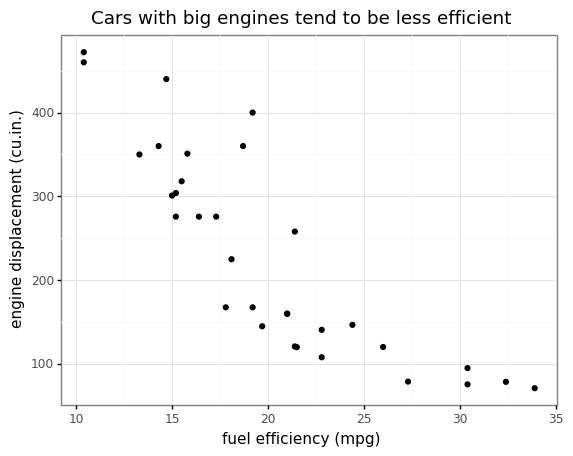

<ggplot: (378790388)>

In [2]:
display(
    ggplot(mtcars,                   # data
        aes('mpg', 'disp'))          # aesthetics
        + geom_point()               # geometry
        + theme_bw()
        + labs(
            title = "Cars with big engines tend to be less efficient",
            y = "engine displacement (cu.in.)",
            x = "fuel efficiency (mpg)"
        )
)   

**Summary:**

According to [Soren Heitmann](https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html), the engine displacement of a car is a good proxy for the total amount of power the engine can generate. As you can see in the chart above, among the cars that Motor Trend looked at, those with that generated more power tended to be less fuel efficient.

**Reflection**

What I can conclude based on this chart:
- Among the cars that motortrend analyzied, the cars with bigger engines have lower fuel efficiency
- Bigger engines are correlated with lower fuel efficiency

What I can't conclude based on this chart:
- Bigger engines are less efficient. 
    - In order to come to this conclusion, I would also need to 👉________________

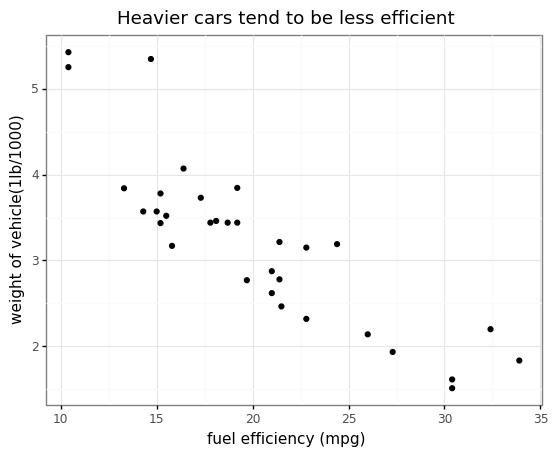

<ggplot: (378749350)>

In [3]:
# 👉Chart 1
# Insert code for a plotnine chart below
(
    ggplot(mtcars,                   # data
        aes('mpg', 'wt'))            # aesthetics
        + geom_point()               # geometry
        + theme_bw()
        + labs(
            title = "Heavier cars tend to be less efficient",
            y = "weight of vehicle(1lb/1000)",
            x = "fuel efficiency (mpg)"
        )
)   


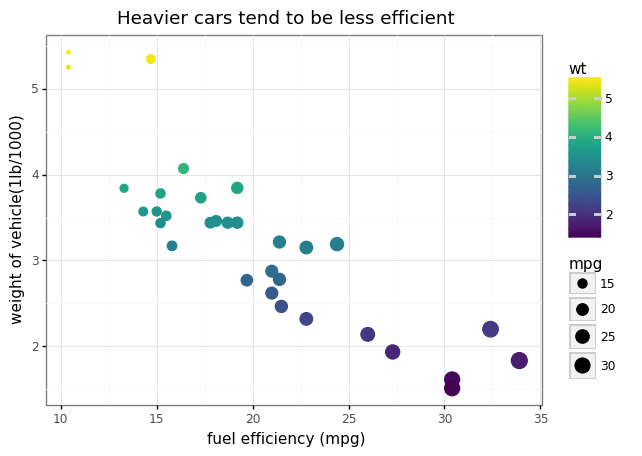

<ggplot: (379004666)>

In [4]:
(
    ggplot(mtcars,                                                # data
        aes('mpg', 'wt'))                                         # aesthetics
        + geom_point(aes(color = 'wt',size ='mpg'))               # geometry
        + theme_bw()
        + labs(
            title = "Heavier cars tend to be less efficient",
            y = "weight of vehicle(1lb/1000)",
            x = "fuel efficiency (mpg)"
        )
)   




#geom_point(aes(color = 'wt', size = 'mpg'))

**👉Chart 1 Summary**
As Chart shows, the overall weight of a car per 1000pounds(half ton US), has a reflection on fuel efficiency. Heavier cars on the chat corresponded to lesser fuel efficiency.

**👉Reflection**
Weight of cars are a good determinant of whether they are fuel efficient or not.
- TKTK
    
What I can't conclude based on this chart:
Speed of car corresponding to weight is not an indicator for this chart. That conclusion cannot be drawn
- TKTK


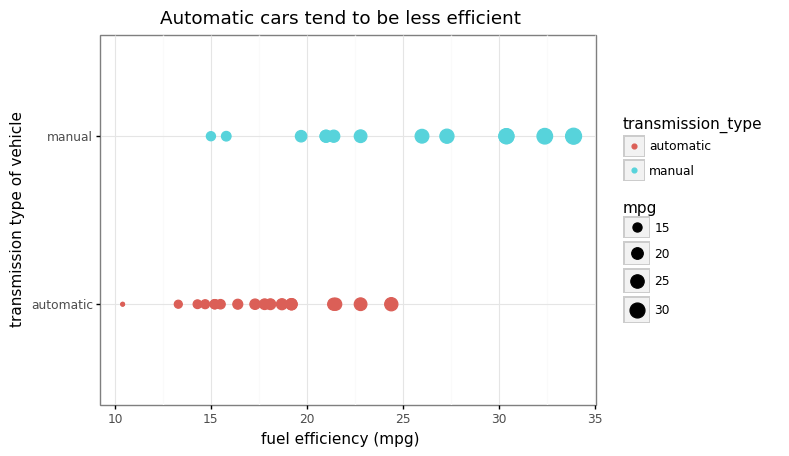

<ggplot: (379104250)>

In [6]:
# 👉Chart 2
# Insert code for a plotnine chart below

(
    ggplot(mtcars,                                                # data
        aes('mpg', 'transmission_type'))                          # aesthetics
        + geom_point(aes(color = 'transmission_type',size ='mpg'))# geometry
        + theme_bw()
        + labs(
            title = "Automatic cars tend to be less efficient",
            y = "transmission type of vehicle",
            x = "fuel efficiency (mpg)"
        )
)   



**👉Chart 2 Summary**
Automatic transmission type cars tend to be less fuel efficient compared to Manual tranmission type cars.

**👉Reflection**
Conclusions from the chart are obvious. If you want a more fuel efficient car, a manual transmission car is your best bet. 
- TKTK
What I can't conclude based on this chart: other indicators like weight, horsepower, and accleration are not indicated and cannot be deduced from the chart
- TKTK


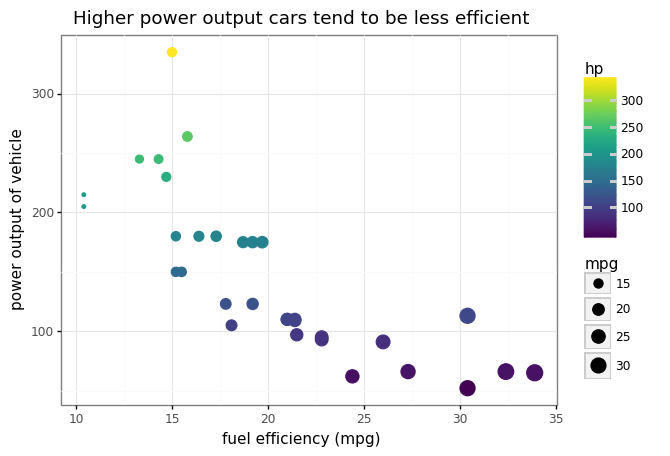

<ggplot: (378973898)>

In [9]:
# 👉Chart 3
# Insert code for a plotnine chart below

(
    ggplot(mtcars,                                                # data
        aes('mpg', 'hp'))                                         # aesthetics
        + geom_point(aes(color='hp', size ='mpg'))               # geometry
        + theme_bw()
        + labs(
            title = "Higher power output cars tend to be less efficient",
            y = "power output of vehicle",
            x = "fuel efficiency (mpg)"
        )
)   

**👉Chart 3 Summary**
Cars with higher output power tend to be less fuel efficient. In effect, exhaust systems, carburetor, alternator, power systems, all influence the power, but also have a direct co-relation with fuel efficiency.

**👉Reflection**
A more fuel efficient vehicle is likely to have lower power output in horsepower. If you tend to like cars with greater horsepower, greater chance they will have less fuel efficiency.

What I can conclude based on this chart: 
Cars with higher power are less efficient
- TKTK
What I can't conclude based on this chart:
the speed in relation to  horsepower is not indicated in this chart and cannot be inferred.
- TKTK


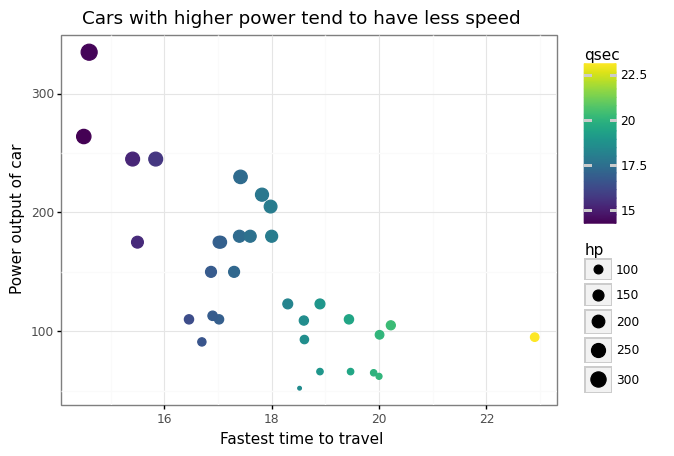

<ggplot: (379287037)>

In [11]:
# 👉Chart 4
# Insert code for a plotnine chart below
(
ggplot(mtcars,
      aes('qsec','hp'))
      +geom_point(aes(color='qsec', size ='hp'))
      +theme_bw()
      +labs (
      title = "Cars with higher power tend to have less speed",
      y = "Power output of car",
      x = "Fastest time to travel"
      )
)

**👉Chart 4 Summary**
According to Soren Heitmann, meausring the performance measure of acceleration, which is a good indicator of the fastest time to travel 1/4 mile from standstill (in seconds). As the chart indicates, the cars with higher output power tend to have the lowest start time to travel1/4mile from standstill.

**👉Reflection**
What I can conclude based on this chart: A car's horsepower is an indication of its speed.
- TKTK
    
What I can't conclude based on this chart:
- TKTK
